# Lecture 5. Decision Trees and Ensembling
Mikhail Belyaev and Maxim Panov

## Example: Iris Data Set

#### Task: 
consider the flowers characterized by
* sepal length
* sepal width
* petal length
* petal width

and identifie the species based on those measurements alone.

![image](./figures/petal_sepal.jpg)




## Iris setosa
![image](./figures/iris_setosa.jpg)

## Iris virginica
![image](./figures/iris_virginica.jpg)

## Iris versicolor
![image](./figures/iris_versicolor.jpg)

### Decision tree example
![image](./figures/iris_1.png)

### Decision tree example

![image](./figures/iris_2.png)

### How to find informative features?

* We need some notion of information.

### Consider:
* $P$ - total number of positive objects (class 1)
* $N$ - total number of negative objects (class 0)
* $p$ - number of correctly classified objects of class 1
* $n$ - number of incorrectly classified objects of class 0 (classified as class 1)

## Different information criteria

![image](./figures/criteria.png)

![image](./figures/fancy_tree.png)

## Probabilities (sample means)

> Before the first split:

$$P(y=\text{BLUE}) = \frac{9}{20} = 0.45$$

$$P(y=\text{YELLOW}) = \frac{11}{20} = 0.55$$

> After the first split:

$$P(y=\text{BLUE}|X\leq 12) = \frac{8}{13} \approx 0.62$$
$$P(y=\text{BLUE}|X> 12) = \frac{1}{7} \approx 0.14$$

$$P(y=\text{YELLOW}|X\leq 12) = \frac{5}{13} \approx 0.38$$
$$P(y=\text{YELLOW}|X > 12) = \frac{6}{7} \approx 0.86$$

## Entropy

$$
H(p) = - \sum_{i = 1}^K p_i\log(p_i)
$$


> Before the first split

$$H = - 0.45 \log 0.45 - 0.55 \log 0.55 \approx 0.69 $$

> After the first split

$$H_{\text{left}} = - 0.62 \log 0.62 - 0.38 \log 0.38 \approx 0.66$$

$$H_{\text{right}} = - 0.14 \log 0.14 - 0.86 \log 0.86 \approx 0.40$$

$$H_{\text{total}} =  \frac{13}{20} 0.66 + \frac{7}{20} 0.40 \approx 0.57$$

## Information Gain
$$
IG = H(\text{parent}) - H(\text{child})
$$


$$IG = 0.69 - 0.57 = 0.12$$

## Decision tree algorithm
Do iteratively:
1. Find most informative combination of
  * node of the tree
  * feature
  * split value
2. Do split if
  * *max_depth* is not reached
  * there is more than *min_samples_split* objects in the node
  * there is more than *min_samples_leaf* objects in a leaf after the split

## Decision tree advantages

* Simple to understand and interpret.
* Able to handle both numerical and categorical data. 
* Possible to validate a model using statistical tests. 
* Robust. 
* Performs well with large datasets.

## Sklearn example (pair-wise classification) 

In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 9)

### Loading

In [20]:
iris_df = sns.load_dataset("iris")
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


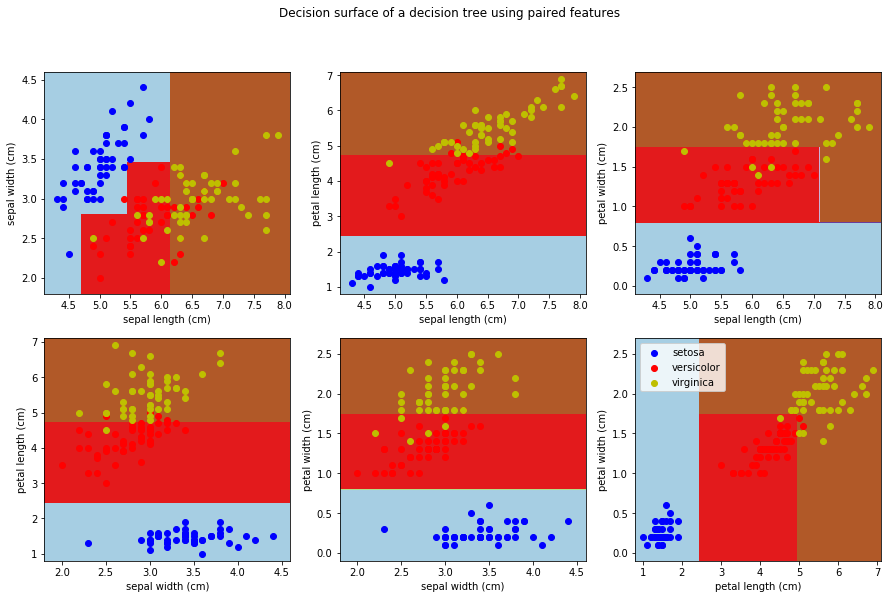

In [21]:
# slightly simplified sklearn example
# see http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3 
plot_colors = "bry"
plot_step = 0.005

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()

### Decision surfaces for pair-wise classification problems with Iris data

![image](./figures/decision_surface_trees.png)

### Plotting decision trees

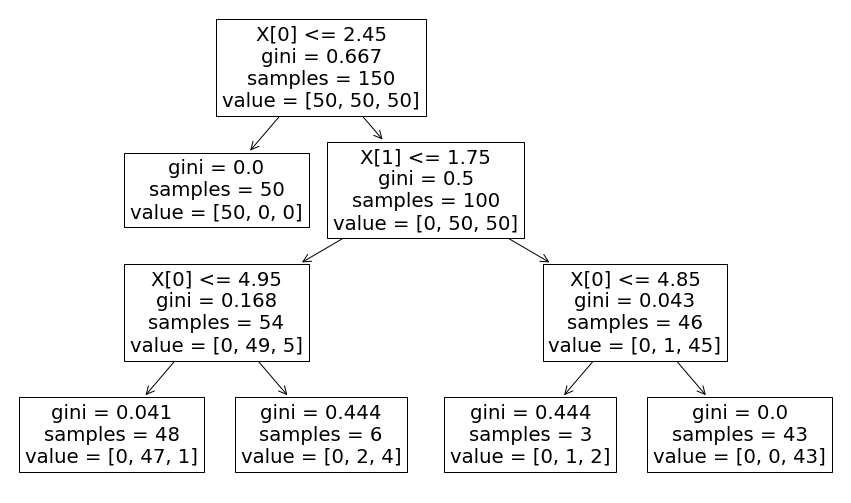

In [31]:
from sklearn.tree import plot_tree

output = plot_tree(clf)

## Check bias-variance tradeoff 

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_informative=5)

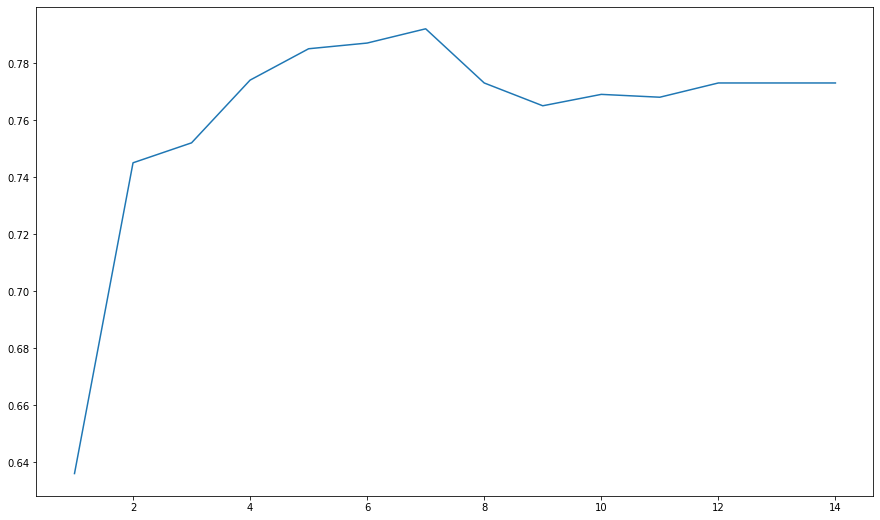

In [23]:
acc = [cross_val_score(DecisionTreeClassifier(max_depth=max_depth), X, y, cv=5).mean()
       for max_depth in range(1, 15)]
plt.plot(range(1, len(acc) + 1), acc)

# Ensembling

#### Toy Classification Problem

* Data $X$ and $Y$ , with $Y$ taking values $+1$ or $−1$.
* Here $X = (X_1, X_2)$.
* The black boundary is the **Bayes Decision Boundary** - the best one can do.
* **Goal:** Given $N$ training pairs $(X_i, Y_i)$ produce a classifier $\hat{C}(X) \in \{-1, 1\}$.

![image](./figures/toy_1.PNG)

* Deterministic problem noise comes from sampling distribution of $X$.
* Use a training sample of size 200.
* Here **Bayes Error** is $0 \%$.

![image](./figures/toy_2.PNG)

* Classification tree provides a specific type of decisoin boundary.
* When the sphere is in 10-dimensions, Classification Trees produces a rather noisy and inaccurate rule $\hat{C}(X)$ with error rates around $30\%$.

![image](./figures/toy_3.PNG)

Classification trees can be simple, but often produce noisy or weak classifiers.

* **Bagging** (Breiman, 1996): Fit many large trees to bootstrap-resampled versions of the training data, and classify by majority vote.
* **Boosting** (Freund & Shapire, 1996): Fit many large or small trees to reweighted versions of the training data. Classify by weighted majority vote.
* **Random Forests** (Breiman 1999): Fancier version of bagging.

In general Boosting > Random Forests > Bagging > Single Tree.

## Bagging

* Suppose $C(S, x)$ is a classifier, such as a tree, based on our training data $S$, producing a predicted class label at input point $x$.
* To bag $C$, we draw bootstrap samples $S_1, \dots, S_B$ each of size $N$ with replacement from the training data. 
* Then $\hat{C}_{bag}(x) = Majority Vote \{C(S_b, x)\}_{b = 1}^B$.

* Bagging can dramatically reduce the variance of unstable procedures (like trees), leading to improved prediction. 
* However any simple structure in $C$ (e.g a tree) is lost.

Bagging averages many trees, and produces smoother decision boundaries.

![image](./figures/toy_bagging.PNG)

#### Random Forests
* Refinement of bagged trees; quite popular.
* At each tree split, a random sample of $m$ features is drawn, and only those $m$ features are considered for splitting. 
* For each tree grown on a bootstrap sample, the error rate for observations left out of the bootstrap sample is monitored. This is called the “out-of-bag” error rate.
* Random forests tries to improve on bagging by “de-correlating” the trees.

#### Parameters of Random Forests

* *n_estimators* - the number of trees in the forest.
* *max_features* - the number of features to consider when looking for the best split.
* *bootstrap* - whether bootstrap samples are used when building trees.
* All the parameters of decision trees.

#### Boosting

* Average many trees, each grown to re-weighted versions of the training data:
  $$C_i(x) = \arg\min_{c(x)} \sum_{j = 1}^n \beta_j^{(i)} \ell_j(y_j, c(x_j))$$.

* Final Classifier is weighted average of classifiers: $C(x) = sign \Bigl[\sum_{m=1}^M \alpha_m C_m(x)\Bigr]$.

![image](./figures/boosting.PNG)

There exist different boosting schemes:
* The classical AdaBoost approach
* One of the most popular boosting schemes: *Gradient Boosting*.

For gradient boosting several implementations exist:
* GradientBoostingClassifier from Sklearn
* XGboost - de-facto standard for the analysis of tabular data



## Bonus: Bongard problems
* Present two sets of relatively simple diagrams, say A and B.
* All the diagrams from set A have a common factor or attribute, which is lacking in all the diagrams of set B.
* The problem is to find, or to formulate, convincingly, the common factor.

![image](./bongard/2.PNG)

![image](./bongard/6.PNG)

![image](./bongard/12.PNG)

![image](./bongard/16.PNG)

![image](./bongard/27.PNG)

![image](./bongard/44.PNG)

![image](./bongard/50.PNG)

![image](./bongard/69.PNG)